# Notebook to analyze output of Grid code for SU(4)
## Gather Plaquette, polyakov loop and Acceptance 
Author: Venkitesh Ayyar (vayyar@bu.edu) \
March 27, 2023

In [106]:
import numpy as np
import matplotlib.pyplot as plt

In [107]:
import subprocess as sp
import os 
import glob
import pandas as pd

In [108]:
# %matplotlib widget

In [109]:
%matplotlib notebook

### Get Plaquette value

In [172]:
def f_get_plaquette(fname):
    
    
    # Get Plaquette values
    cmd="grep 'Plaq' %s"%(fname)
#     print(cmd)
    op=sp.check_output(cmd,shell=True).decode().split('\n') # decode bytes to string and split by newlines
    op=[i for i in op if i] # Drop null string
    # print(op[0])

    arr=np.array([[int(i.split('[ ')[-1].split(' ]')[0]), 
      np.float64(i.split(' ')[-1]),
      np.float64(i.split(': ')[2].split(' s')[0])] 
     for i in op])
    
    return arr

def f_get_polyakov(fname):
    
    # Gather Polykov loop values
    cmd="grep 'Polyakov' %s"%(fname)
#     print(cmd)
    op=sp.check_output(cmd,shell=True).decode().split('\n') # decode bytes to string and split by newlines
    op=[i for i in op if i] # Drop null string
    # print(op[0])

    arr=np.array([complex(np.float64(i.split(' ')[-1][1:-1].split(',')[0]),
             np.float64(i.split(' ')[-1][1:-1].split(',')[1])) 
     for i in op ])
    
    return arr


def f_get_traj_time(fname):
    
        ## Total time
    cmd="grep 'Total time for trajectory' %s"%(fname)
#     print(cmd)
    op=sp.check_output(cmd,shell=True).decode().split('\n') # decode bytes to string and split by newlines
    op=[i for i in op if i] # Drop null string
    # print(op[0])

    arr=[np.float32(i.split(': ')[-1]) for i in op]
    
    return arr

def f_get_metropolis(fname,lgth):
    
        ## Metropolis values
    cmd="grep 'Metropolis_test' %s"%(fname)
#     print(cmd)
    op=sp.check_output(cmd,shell=True).decode().split('\n') # decode bytes to string and split by newlines
    op=[i for i in op if i] # Drop null string
    # print(op[0])

    ## Other arrays have equilibriation data, metropolis doesn't. So we need to add nans to make them the same size
    
    arr_temp=[1 if (i.split(' ')[-1]=='ACCEPTED') else 0 for i in op] # Accept =1 , Reject = 0
    skip=lgth-len(arr_temp)
#     print("skip",skip)
    arr_skip=[np.nan for i in range(skip)]
    arr=np.array(arr_skip+arr_temp)
    
    return arr



def f_gather_data(fname):
    
    full_size=210 ## Trick to avoid double runs
    
    arr1=f_get_plaquette(fname)[:full_size]
    
    arr2=f_get_polyakov(fname)[:full_size]
    
    arr3=f_get_traj_time(fname)[:full_size]
    
    lgth=min(len(arr1),len(arr2),len(arr3))
    print(lgth)

    arr4=f_get_metropolis(fname,lgth)[:full_size]
    
    ## Create dataframe
    cols=['iter','Plaquette','Polyakov','Traj_time','Accept','Plaq_epoch']
    df=pd.DataFrame(columns=cols)

    df['Plaquette']=arr1[:,1]
    df['Plaq_epoch']=arr1[:,2]
    df['iter']=arr1[:,0].astype(int)
    df['Polyakov']=arr2
    df['Traj_time']=arr3
    df['Accept']=arr4

    return df


In [194]:
beta=10.75
# fname='/usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2022_nov16/dm_tests/run1/SDM.4node'
# fname='/usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2022_nov30/dm_tests/run_dwf/SDM.4node'

# fname='/usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_march14/dm_tests/runs/run3_hsdm/SDM.4node'
fname='/usr/workspace/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_march14/dm_tests/runs/run_Lx-16_Lt-8_beta-%s_mf-0.6443/HSDM.out'%(beta)

print(fname)
df = f_gather_data(fname)

/usr/workspace/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_march14/dm_tests/runs/run_Lx-16_Lt-8_beta-10.75_mf-0.6443/HSDM.out
210


In [195]:
df

,iter,Plaquette,Polyakov,Traj_time,Accept,Plaq_epoch
0,1,0.685297,0.207644-0.001287j,14.3737,0,17.917656
1,2,0.651538,0.143012+0.003628j,14.0163,1,31.951271
2,3,0.627536,0.103060+0.001101j,14.0739,1,46.425730
3,4,0.609223,0.078803+0.003878j,14.0800,1,60.139923
4,5,0.596669,0.075137+0.002309j,14.0923,1,74.249622
...,...,...,...,...,...,...
205,206,0.560598,0.000123+0.002798j,14.2572,1,2948.523838
206,207,0.560574,0.004350-0.002768j,14.2711,1,2962.812565
207,208,0.560709,0.000652+0.005216j,14.2621,1,2977.922100
208,209,0.560100,0.003275-0.002928j,14.2661,1,2991.375766


## Plot Plaquette

<IPython.core.display.Javascript object>


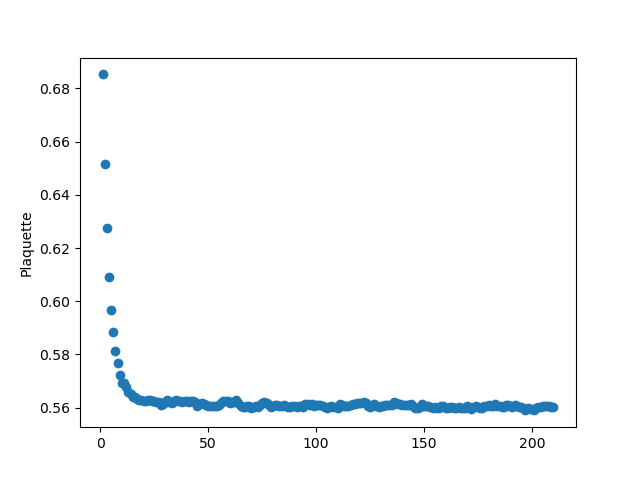

In [196]:
plt.figure()
x=df.iter.values
y=df.Plaquette.values
# y=df.Traj_time.values

plt.plot(x,y,marker='o',linestyle='')
plt.ylabel('Plaquette')
plt.show()

### Plot Polyakov loop

<IPython.core.display.Javascript object>


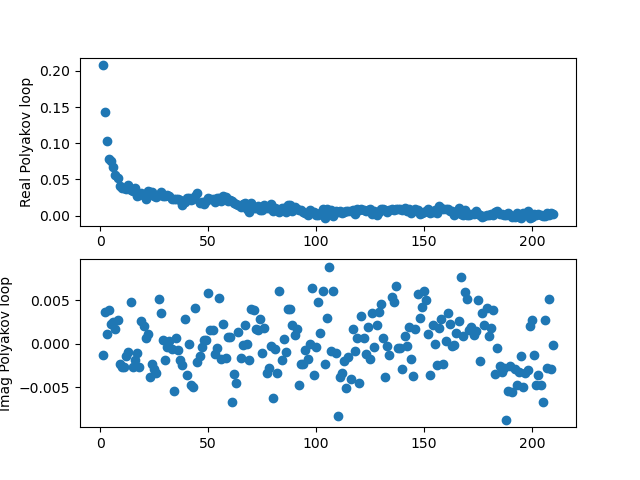

In [197]:
fig=plt.figure()
x=df.iter.values
y=df.Polyakov.values
fig.add_subplot(2,1,1)

plt.plot(x,y.real,marker='o',linestyle='')
plt.ylabel('Real Polyakov loop')

fig.add_subplot(2,1,2)

plt.plot(x,y.imag,marker='o',linestyle='')
plt.ylabel('Imag Polyakov loop')
plt.show()


<IPython.core.display.Javascript object>


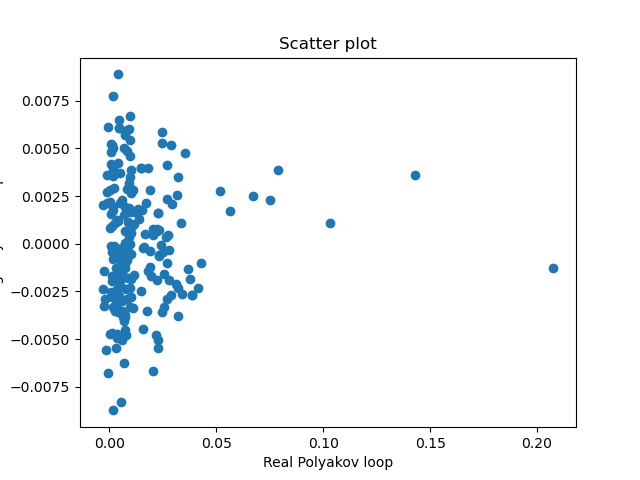

In [199]:
fig=plt.figure()
x=df.iter.values
y=df.Polyakov.values

y1=y.real
y2=y.imag

plt.scatter(y1,y2)
plt.xlabel('Real Polyakov loop')
plt.ylabel('Imag Polyakov loop')
plt.title("Scatter plot")
plt.show()

### Polyakov loop histogram 

<IPython.core.display.Javascript object>


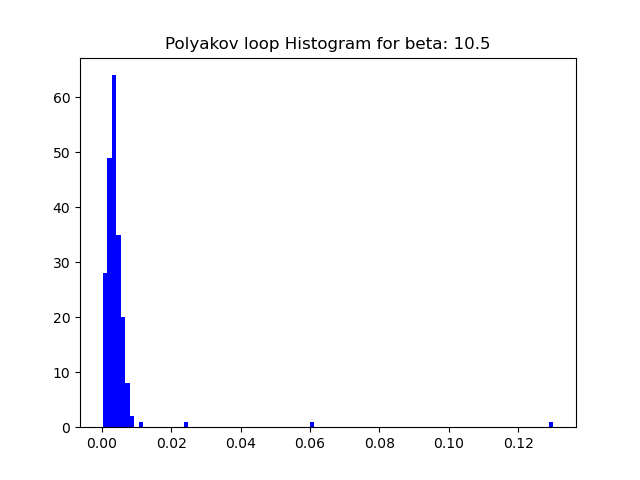

Text(0.5, 1.0, 'Polyakov loop Histogram for beta: 10.5')

In [192]:
fig=plt.figure()
x=df.iter.values[:210]
y=np.abs(df.Polyakov.values[:210])

# hist,bins=np.histogram(y,bins=10)
# plt.bar(np.linspace(0,0.3,10),hist)
# plt.stairs(hist)

plt.hist(y,bins=100,color='b')

# plt.xlabel('Real Polyakov loop')
# plt.ylabel('Imag Polyakov loop')
plt.title("Polyakov loop Histogram for beta: %s"%(10.50))
# plt.savefig('ploop_histogram.pdf')


### Plot acceptance

<IPython.core.display.Javascript object>


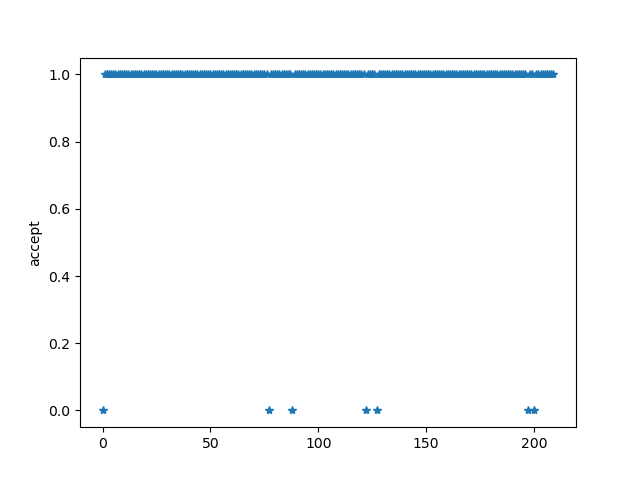

In [180]:
plt.figure()
x=df.iter.values
y=df.Accept.values
plt.ylabel('accept')
plt.plot(y,marker='*',linestyle='')
plt.show()

In [17]:
# Print Acceptance ratio
ct=df['Accept'].dropna().value_counts()
print(ct)

if len(ct)<2:
    print("Only one type",ct)
    pass 
elif len(ct)==2:     
    Act=ct[1]
    Rft=ct[0]
    print(Act* 100 /(Act+Rft),'%')

1.0    392
0.0      8
Name: Accept, dtype: int64
98.0 %
